## **Модуль 2. Машинное обучение и решающие деревья**

# **Урок 1. Entropy reduction**

**Решающие деревья** - метод машинного обучения, классифицирующий данные с помощью последовательных вопросов к ним.
Например, нам нужно выяснить, является ли письмо спамом:


```
if отправителя нет в списке контактов:
    return True
else:
    if в письме много восклицательных знаков:
        return True
    else:
        if в письме есть триггерные слова (конкурс, викторина, розыгрыш, выплата, акция, ...):
            return True
return False
```





Если у нас есть датафрейм с N независимыми переменными, и нужно по нему научиться предсказывать 1 зависимую переменную, то мы строим систему координат с N осями, где каждая точка - это какая-то строка из датафрейма, её координаты - значения соответствующих независимых переменных. Значение зависимой переменной в этой точке можно обозначать цветом

*Теперь рассмотрим пример применения дерева решений*

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [4]:
np.random.seed(0)

In [5]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

Хотим научиться предсказывать значения переменной Y, основываясь на значениях переменных X1 и X2

In [6]:
# наше дерево решений

classifier = tree.DecisionTreeClassifier(criterion='entropy')

Разобьём данные на независимые переменные (их мы используем для обучения) и зависимые (их нужно предсказать)

In [7]:
X = data[['X_1', 'X_2']]
y = data['Y']

Обучаем наше дерево решений:

In [8]:
classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Визуализируем полученное дерево:

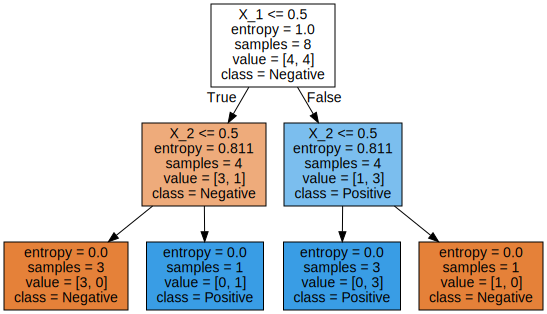

In [9]:
# Positive := y==1, Negative := y==0 (просто обозначения)

graph = Source(tree.export_graphviz(classifier,
                                    out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

# **Урок 3. Titanic. Machine Learning from Disaster**

Рассмотрим более сложный пример.
Нужно предсказать, кто из пассажиров "Титаника" выживет в катастрофе, а кто погибнет

In [10]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Проверим, в каких колонках много пропущенных значений ==> от каких переменных можно отказаться

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Отбросим лишние переменные

In [13]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin'], axis=1)
y = titanic_data.Survived

In [14]:
# заменяет номинативные переменные на числа

X = pd.get_dummies(X)

In [15]:
X = X.fillna({'Age': X.Age.median()})

Создаём и обучаем дерево решений

**Замечание**: дерево решений из sklearn может работать только с числовыми данными, поэтому все номинативные переменные нужно закодировать числами

**Замечание**: дерево решений не умеет работать с NaN

In [16]:
titanic_classifier = tree.DecisionTreeClassifier(criterion='entropy')

In [17]:
titanic_classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Визуализируем полученное дерево решений:

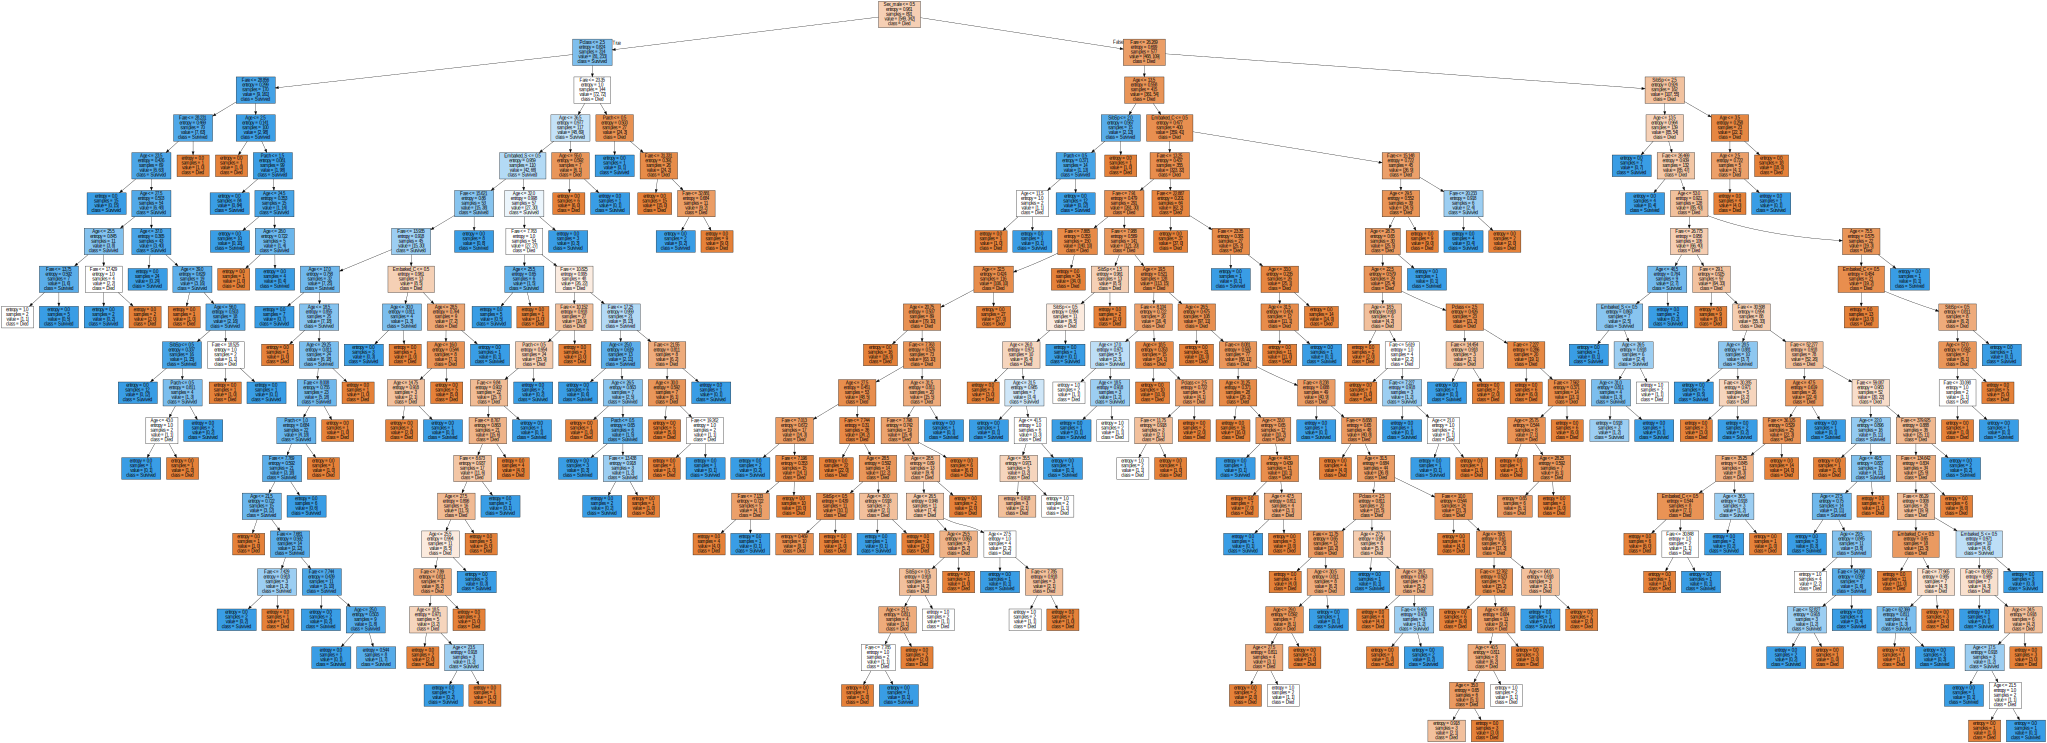

In [18]:
graph = Source(tree.export_graphviz(titanic_classifier,
                                    out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

Чтобы проверить, хорошо ли обучилась модель, нужно разбить датасет на тренировочную выборку и тестовую выборку. Обучаем на тренировочной, проверяем на тестовой

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# метод score возвращает процент правильных ответов обученной модели по данному разбиению

titanic_classifier.score(X, y)

0.9797979797979798

In [22]:
titanic_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
titanic_classifier.score(X_train, y_train)

0.9798657718120806

In [24]:
titanic_classifier.score(X_test, y_test)

0.7661016949152543

Ограничим глубину дерева решений, чтобы избежать переобучения

In [25]:
titanic_classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
titanic_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
titanic_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [28]:
titanic_classifier.score(X_train, y_train)

0.8406040268456376

In [29]:
titanic_classifier.score(X_test, y_test)

0.8067796610169492

# **Урок 4. Обучение, переобучение, недообучение и кроссвалидация**

Построим график зависимости качества предсказаний модели (на тренировочных и тестовых данных) от максимальной глубины дерева

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
for depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

  temp_scores_data = pd.DataFrame({
                                    'max_depth': [depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]
                                   })
  scores_data = scores_data.append(temp_scores_data)

In [32]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392


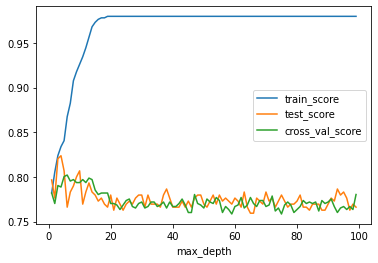

In [33]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score', 'cross_val_score'])

Проведём кросс-валидацию

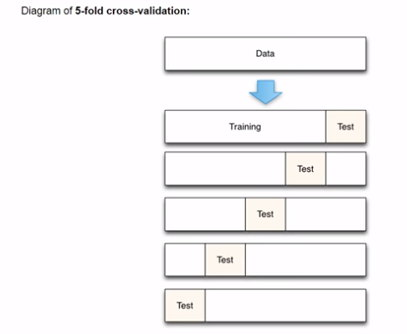

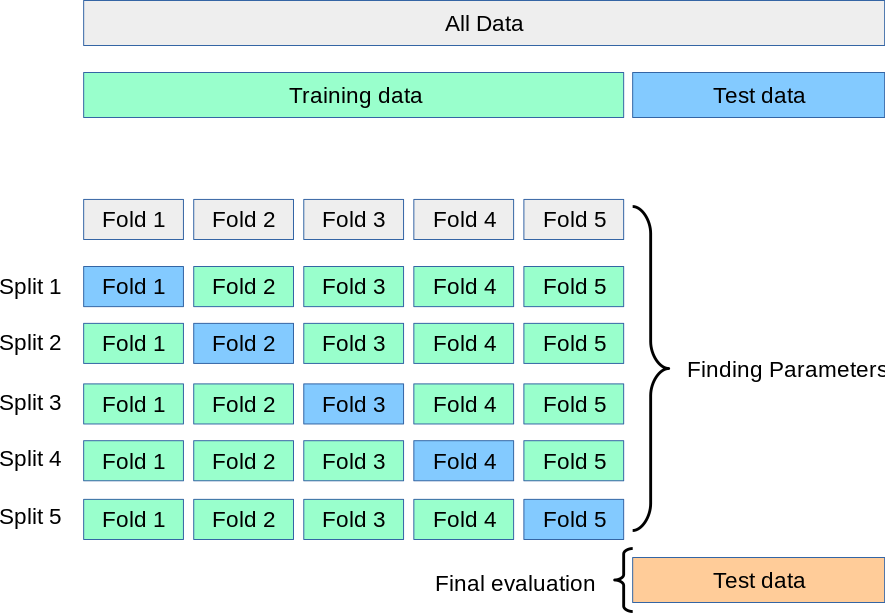

Статья с объяснением: https://scikit-learn.org/stable/modules/cross_validation.html

In [34]:
titanic_classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
cross_val_score(titanic_classifier, X_train, y_train, cv=5).mean()

0.7886274509803922

In [36]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [37]:
best_clf.fit(X_train, y_train)

best_clf.score(X_test, y_test)

0.8033898305084746

# **Урок 5.  Последний джедай или метрики качества модели**

Точность предсказаний (accuracy) не всегда является оптимальным показателем для оценки качества модели. Поэтому применяются и другие метрики:

*Precision* = TP / (TP + FP)          
*Recall* = TP / (TP + FN)

где TP = true positive, FP = false positive (не надо было предсказывать, но мы предсказали), FN = false negative (надо было предсказать, но мы не предсказали)

Precision и Recall применяют в зависимости от цели применения модели. Чтобы найти оптимальное соотношение между ними, используют F-меру:

F = 2⋅Precision⋅Recall / (Precision + Recall)

# **Урок 6. Подбор параметров и ROC and Roll**

Объект GridSearchCV позволяет автоматически подобрать оптимальные параметры модели с помощью кросс-валидации

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

In [39]:
clf = tree.DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [40]:
grid_search_cv_classifier = GridSearchCV(clf, parameters, cv=5)

In [41]:
grid_search_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [42]:
grid_search_cv_classifier.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [43]:
best_classifier = grid_search_cv_classifier.best_estimator_
best_classifier.score(X_test, y_test)

0.7830508474576271

In [44]:
y_pred = best_classifier.predict(X_test)

In [45]:
precision_score(y_test, y_pred)

0.7592592592592593

In [46]:
recall_score(y_test, y_pred)

0.6833333333333333

Найдём вероятность отношения каждого человека к оному из двух классов (выжил - не выжил)

In [47]:
y_predicted_prob = best_classifier.predict_proba(X_test)

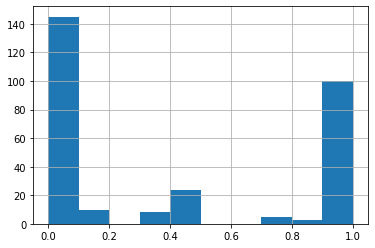

In [48]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [49]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)

In [50]:
precision_score(y_test, y_pred)

0.6857142857142857

In [51]:
recall_score(y_test, y_pred)

0.8

Нарисуем ROC-кривую (здесь true positive rate = recall)

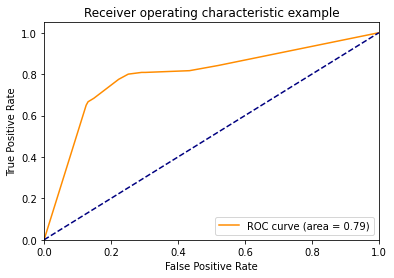

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## **Модуль 3. Random forest, нейронные сети, финал**

# **Урок 1. Снова возвращаемся к деревьям**

Чтобы избежать переобучения дерева, можно регулировать не только его глубину, но и другие параметры, например, *min_simple_split* (сколько минимум значений должно быть в вершине, чтобы её можно было разделить) и *min_simple_leaf* (какое минимальное количество значений должно быть в листе дерева)

In [53]:
clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3, 
    min_samples_split=100,
    min_samples_leaf=10
)

In [54]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

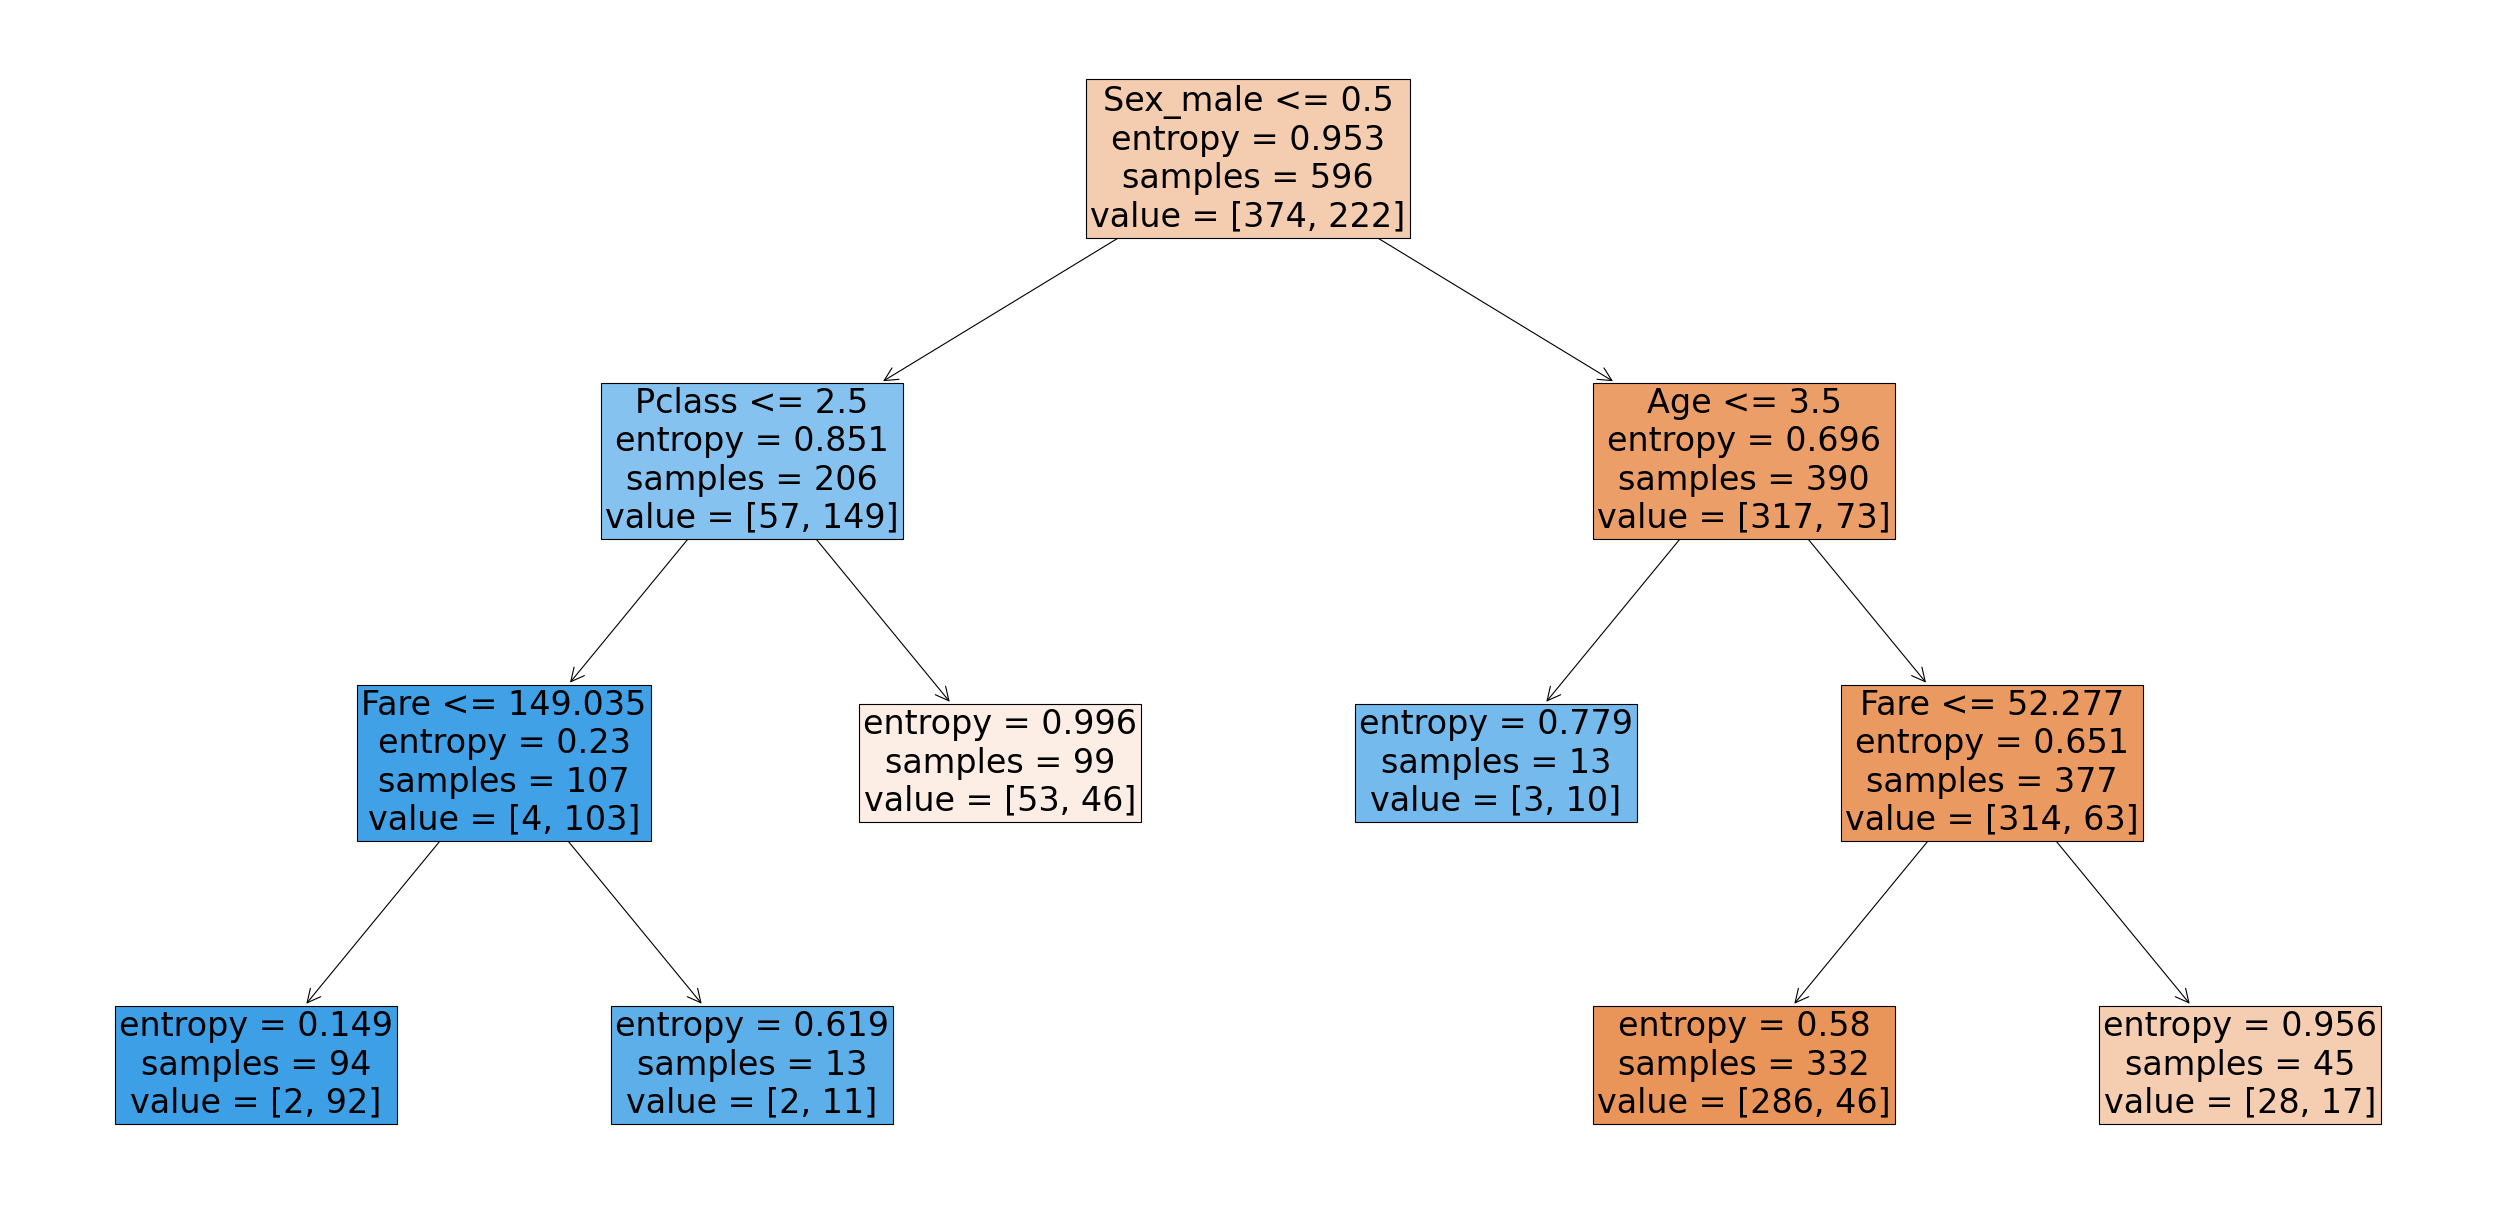

In [55]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))

In [56]:
clf = tree.DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1, 30),
             'min_samples_split': range(10, 200, 25), 
              'min_samples_leaf': range(5, 50, 5)}
best_clf = GridSearchCV(clf, parameters, cv=5)
best_clf.fit(X_train, y_train)
best_clf.best_params_

KeyboardInterrupt: ignored

# **Урок 2. Random forest**

**Random forest** - ещё один метод машинного обучения, заключающийся в том, что мы создаём не одно большое дерево решений, а множество маленьких, каждому из которых даём некоторый кусок датафрейма (подмножество столбцов и строк). Каждое дерево делает частное предсказание, а итоговое предсказание мы получаем, усреднив их

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf_rf = RandomForestClassifier()

In [60]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

In [62]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [63]:
best_clf = grid_search_cv_clf.best_estimator_

In [64]:
best_clf.score(X_test, y_test)

0.8135593220338984

In [67]:
feature_importancens = best_clf.feature_importances_

In [74]:
feature_importancens_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importancens': feature_importancens})

In [75]:
feature_importancens_df.sort_values('feature_importancens', ascending=False)

,features,feature_importancens
6,Sex_male,0.275496
5,Sex_female,0.237056
0,Pclass,0.135823
1,Age,0.113110
4,Fare,0.110856
3,Parch,0.037991
2,SibSp,0.036398
9,Embarked_S,0.024874
7,Embarked_C,0.024254
8,Embarked_Q,0.004142
